In [1]:
import pandas as pd
import urllib
from urllib.request import urlopen
import json
import datetime
import numpy as np



In [2]:
def extract_coinmarketcap(coin, coin_col=False):

        """Retrieve basic historical information for a specific cryptocurrency from coinmarketcap.com

        

        Parameters

        ----------

        coin : the name of the cryptocurrency (e.g. 'bitcoin', 'ethereum', 'dentacoin')

        coin_col : whether to include the coin name as a column

            (default is False i.e. the column is not included)

            

        Returns

        -------

        pandas Dataframe

        """

        try:
            #print(self)
            #print(coin)
            #print(coin_col)
            from_date = "2017-04-27"
            to_date = "2018-04-27"
            output = pd.read_html("https://coinmarketcap.com/currencies/{}/historical-data/?start={}&end={}".format(
                coin, from_date.replace("-", ""), to_date.replace("-", "")))[0]
           # output= pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20170408&end=20180428")
                                 
        except Exception as e:

            return pd.DataFrame({"error":e}, index=[0])

        output = output.assign(Date=pd.to_datetime(output['Date']))

        for col in output.columns:

            if output[col].dtype == np.dtype('O'):

                output.loc[output[col]=="-",col]=0

                output[col] = output[col].astype('int64')

        output.columns = [col.lower() for col in output.columns]

        if coin_col:

            output['coin'] = coin

        return output

In [3]:
def get_oil_prices():

        """Retrieve the historical oil price (London Brent crude)

        

        Parameters

        ----------

            

        Returns

        -------

        pandas Dataframe

        

        Notes

        -----

        This site seems to take significantly longer than the others to scrape

        If you get timeout errors, then increase the timeout argument when

        you initalise the cryptory class

        """

        try: 

            parsed_page = urlopen("https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=PET&s=RWTC&f=D",
                                          timeout=20).read()

            parsed_page = parsed_page.decode("utf8")

        except Exception as e:

            return pd.DataFrame({"error":e}, index=[0])

        souped_page = BeautifulSoup(parsed_page, 'html.parser')

        souped_values = [soups.text for soups in souped_page.findAll("td", {"class": "B3"})]

        souped_dates = [datetime.datetime.strptime(

                re.sub('\xa0\xa0| to .*','', soups.text), '%Y %b-%d') 

                        for soups in souped_page.findAll("td", {"class": "B6"})]

        output = []

        for i in range(5):

            output.append(pd.DataFrame({"date":[date + datetime.timedelta(days=i) 

                                                for date in souped_dates],

                           "oil_price":souped_values[i::5]}))

        output = pd.concat(output)

        output.loc[output['oil_price']=="",'oil_price']=np.nan

        output['oil_price'] = pd.to_numeric(output['oil_price'])

        #output = self._merge_fill_filter(output)

        return output

In [4]:
from bs4 import BeautifulSoup
import re
get_oil_prices()

,date,oil_price
0,1985-12-30,NaN
1,1986-01-06,26.53
2,1986-01-13,25.08
3,1986-01-20,21.33
4,1986-01-27,20.87
5,1986-02-03,17.42
6,1986-02-10,16.78
7,1986-02-17,NaN
8,1986-02-24,14.68
9,1986-03-03,11.98


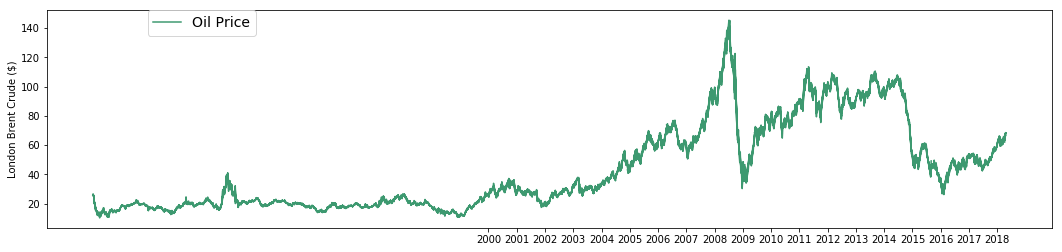

In [7]:
import matplotlib.pyplot as plt

oil_df = get_oil_prices()

fig, ax1 = plt.subplots(1, 1, figsize=(18, 4))
ax1.set_xticks([datetime.date(j,1,1) for j in range(2000,2019)])
ax1.set_xticklabels([datetime.date(j,1,1).strftime('%Y') for j in range(2000,2019)])
ax1.plot(oil_df['date'].astype(datetime.datetime),
         oil_df['oil_price'], label='Oil Price', color='#3D9970')
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., ncol=2, prop={'size': 14})
ax1.set_ylabel('London Brent Crude ($)')
plt.show()